In [22]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt 
import gzip, os
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [24]:
## Load the training set
train_data = pd.read_csv("digit-recognizer/train.csv")
test_data = pd.read_csv("digit-recognizer/test.csv")

targets_numpy = train_data.label.values
features_numpy = train_data.loc[:,train_data.columns != "label"].values

In [8]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

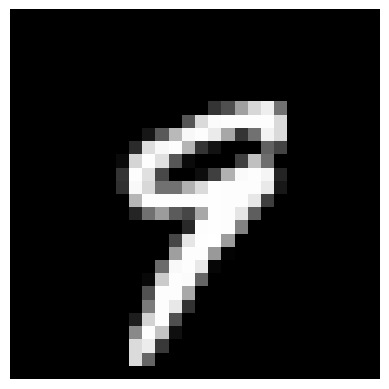

In [26]:
displaychar(features_numpy[58])

## 1. Data preprocessing

In [17]:
train_data = (train_data - np.mean(train_data, axis=1)) ./ np.std(train_data, axis=1)

SyntaxError: invalid syntax (673256352.py, line 1)

## 2. Fit a Gaussian generative model to the training data

**<font color="magenta">For you to do:</font>** Define a function, **fit_generative_model**, that takes as input a training set (data `x` and labels `y`) and fits a Gaussian generative model to it. It should return the parameters of this generative model; for each label `j = 0,1,...,9`, we have:
* `pi[j]`: the frequency of that label
* `mu[j]`: the 784-dimensional mean vector
* `sigma[j]`: the 784x784 covariance matrix

This means that `pi` is 10x1, `mu` is 10x784, and `sigma` is 10x784x784.

We have already seen how to fit a Gaussian generative model in the Winery example, but now there is an added ingredient. <font color="magenta">The empirical covariances are very likely to be singular (or close to singular), which means that we won't be able to do calculations with them</font>. Thus it is important to **regularize** these matrices. The standard way of doing this is to add `cI` to them, where `c` is some constant and `I` is the 784-dimensional identity matrix. (To put it another way, we compute the empirical covariances and then increase their diagonal entries by some constant `c`.)

This modification is guaranteed to yield covariance matrices that are non-singular, for any `c > 0`, no matter how small. But this doesn't mean that we should make `c` as small as possible. Indeed, `c` is now a parameter, and by setting it appropriately, we can improve the performance of the model. We will study **regularization** in greater detail over the coming weeks.

Your routine needs to choose a good setting of `c`. Crucially, this needs to be done using the training set alone. So you might try setting aside part of the training set as a validation set, or using some kind of cross-validation.

In [10]:
def fit_generative_model(x,y):
    k = 10  # labels 0,1,...,k-1
    d = (x.shape)[1]  # number of features
    mu = np.zeros((k,d))
    sigma = np.zeros((k,d,d))
    pi = np.zeros(k)
    # Separate data for validation
    x_size = x.shape[0]
    train_size = round(x_size * 0.99)
    print("Training size is {} out of total {} data point".format(train_size, x_size))
#     x_train = x[:train_size,:]
#     x_validation = x[train_size+1:,:]
#     y_train = y[:train_size]
#     y_validation = y[train_size+1:]
#     nt = len(y_validation)
    x_train = x
    y_train = y
        
    # Initializing the optimizition for c constant
    c = 4000
    gen_tresh = 0.05

    while True:
        for label in range(k):
            indices = (y_train == label)
            mu[label] = np.mean(x_train[indices,:], axis = 0)
            sigma[label] = np.cov(x_train[indices,:], rowvar=0, bias=1)
            sigma[label] += c * np.identity(d)
            pi[label] = np.sum(indices)

#         pi = pi / (x_train.shape)[0]
#         # Test the covariance matrix for c optimization
#         score = np.zeros((x_validation.shape[0],k+1))
#         for i in range(0,nt):
#             for label in range(k):
#                 score[i, label] = np.log(pi[label]) + \
#             multivariate_normal.logpdf(x_validation[i,:], mean=mu[label,:], cov=sigma[label])
#         predictions = np.argmax(score, axis=1)
#         err = np.sum(predictions != y_validation) / nt
#         if err < gen_thresh:
#             print("Final error rate is {}".format(err))
#             break
#         else:
#             print("Error is too large: {}".format(err))
#             c /= 2
        break
    
    # Halt and return parameters
    return mu, sigma, pi

Training size is 59400 out of total 60000 data point


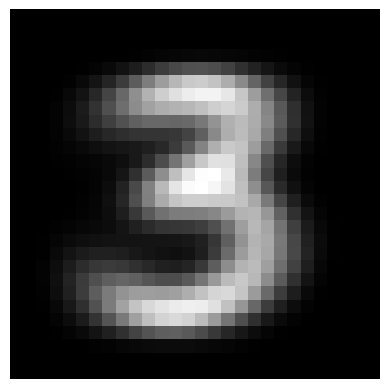

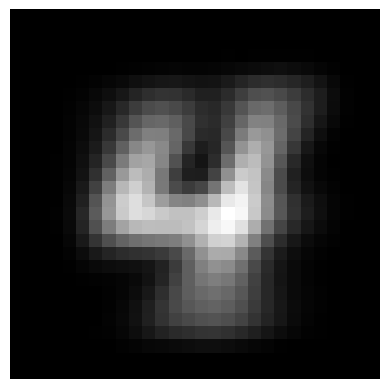

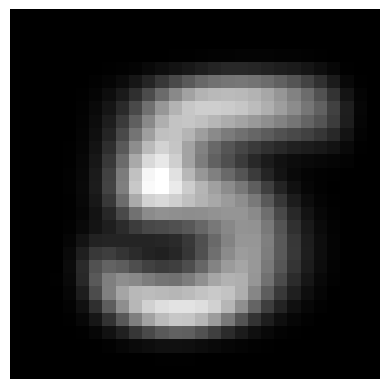

In [18]:
mu, sigma, pi = fit_generative_model(train_data, train_labels)
displaychar(mu[3])
displaychar(mu[4])
displaychar(mu[5])

Kernel-PCA

In [ ]:
from sklearn import datasets, decomposition
kernel_pca = decomposition.KernelPCA(n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
kernel_pca.fit(features_numpy)
result_l = kernel_pca.transform(features_numpy)